# K-means clustering
- Will implement the K-means algorithm and use it for image compression.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## Implementing k-means
- The K-means algorithm is a method to automatically cluster similar data points together.
- We are given a training st {x_1, x_2, ...x_m} and we want to group the data into a few cohensive clusters
- K-means ia an iteration procedure that
    - Starts by guessing the intial centroids, and then
    - Refines this guess by
        - Repeatedly assigning examples to their closes centroid, and then 
        - Recomputing the centroid based on thr assignments.
- In pseducode, the K-means algorithm is as follows:  
    - #Initialize centroids  
    - #K is the number of cluster  
    - centroids = kMeans_init_centroids(X, centroids)  
     
    - for iter in range(iterations): 
        - #Cluster assignment step: 
        - #Assign each data point to the closest centroid.  
        - #idx[i] corresponds to the index of the centroid.  
        - #assigned to example i  
        - idx = find_closest_centroid(X, centroids) 
        - 
          
          
        - #Move centroid step:  
        - #Compute means based on centroid assignments  
        - centroids = compute_centroids(X, idx, k)  
- The inner-loop of the algorithm repeatedly carries out 2 steps : 
    1. Assigning each training example x_i to its closest centroid, and
    2. Recomputing the mean of each centroid using the pointss assigned to it.
- The k-means algorithm will always converge to some final set of means for the centroids.
- However, the converged solution may not always be ideal and depends on the intial setting of the centroids.
    - Therefore, in practice the K-means algorithm is usually run a few times with different random intializations.
    - One way to choose between these different solutons from different random intializations is to choose the one with the lowest cost function value (distortion).

### Finding closest centroids
- The algorithm assigns every training example x_i to its closest centroid, given the current position of centroids.
- find_closest_centroids(X, centroids)
    - This function takes the data matrix X and the location of all the centroids inside centroids.
    - It should output a one-dimensional array idx (which has the same number of elements as X) that holds the index of the closest centroid (0, 1, ...k-1), where k is the  number of centroids, to every training example.
    - Specifically, for every example x_i we set
        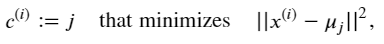
     - where,
         - c(i) iws the index of the centroid that is closest to x(i) (corresponds to idx[i])
         - Mu_j is the position (value) of the jth centroid.
         - || x_i - Mu_j || is the L2-norm.

In [9]:
def find_closest_centroids(X, centroids):
    '''
    Computes the centroid memberships for every example
    
    Args : 
        X (ndarray) : (m, n) Input values
        centroids (ndarray) : (K, n) centroids
        
    Returns : 
        idx (array_like) : (m,) closest centroids
    '''
    
    # set K
    K = centroids.shape[0]
    
    idx = np.zeros(X.shape[0], dtype=int)
    
    for i in range(X.shape[0]):
        # Array to hold distance b/w X[i] and each centroid[j]
        distance = []
        for j in range(centroids.shape[0]):
            # To calculate the norm b/w X[i] -  centroids
            nor_ij = np.linalg.norm(X[i] - centroids[j])
            distance.append(nor_ij)
        
        # To calculate index of minmum value in distance
        idx[i]  = np.argmin(distance)
    
    return idx

In [10]:
X = np.load('ex7_X.npy')

In [11]:
print("First 5 elements of X ar :\n", X[:5])
print("The shape of X is : ", X.shape)

First 5 elements of X ar :
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
The shape of X is :  (300, 2)


In [12]:
# Select the initial set of centroids (3 centroids)
intial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

# Find closest centroids using initial_centroids
idx = find_closest_centroids(X, intial_centroids)

# Print the closest centroids for the first 3 elements
print("First three elements in idx are:", idx[:3])

First three elements in idx are: [0 2 1]


### Computing centroid means
- The second phase of the algorithm recomputes, for each centroid, the mean of the points that were assigned to it.
- The compute_centroid(X, idx, K)
    - Specifically, for every centroid Mu_k is set
        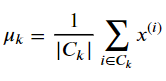
        where, 
        C_k is the set of examples that are asigned to centroid k
        |C_k| is the number of examples in the set C_k
    - Concretly, if 2 examles sat x(3) and x(5) are assigned to centroid k =2, then we should update 
           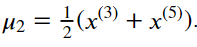

In [13]:
def compute_centroids(X, idx, K):
    '''
    Returns the new centroids by computing the means of the data points assigned to each centroid.
    
    Args:
        X (ndarray) : (m, n) Data points
        idx (ndarray) : (m,) Array containing index of closest centroid for each example in X. 
                        idx[i] contains the index of the centroid closest to example i number of centroids
        k (int) : number of centroids
    
    Returns : 
        centroids (ndarray) : (k, n) new centroids computed
    '''
    
    m, n = X.shape
    
    centroids = np.zeros((K, n))
    
    for k in range(K):
        points = X[idx == k]
        centroids[k] = np.mean(points, axis=0)
    
    return centroids

In [14]:
k = 3
centroids = compute_centroids(X, idx, k)

print("The centroids are: ", centroids)

The centroids are:  [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


## K means on a sample dataset
- The next step is to run the K-means algoerithm on a toy 2D dataser to help us understand how K-means works.
- When we run the code, it will produce a visualization that steps through the progress of the algorithm at each iteration.
    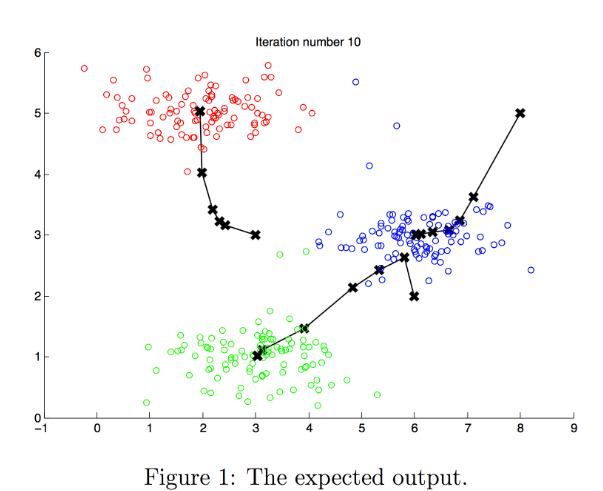

In [28]:
def plot_data_points(X, idx):
    cmap = ListedColormap(["red", "green", "blue"])
    c = cmap(idx)
    
    # Plot data points in X, coloring them so that those with the same
    # Index assignments in idx have the same color
    plt.scatter(X[:, 0], X[:, 1], facecolor='none', edgecolors=c )

In [29]:
def draw_line(p1, p2, style="-k", linewidth=1):
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], style, linewidth=linewidth) 

In [30]:
def plot_progress_KMeans(X, centroids, previous_centroids, idx, K, i):
    # Plot the examples
    plot_data_points(X, idx)
    
    # plot the centroids as black x's
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='k')
    
    # plot history of the centroids with lines
    for j in range(centroids.shape[0]):
        draw_line(centroids[j,:], previous_centroids[j,:])
    
    plt.title("Iteration number %d" %i)

In [31]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    '''
    Runs the K-Means algorithm on data matrix X, where each row of X is a single example.
    '''
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))
    
    for i in range(max_iters):
        print("K-means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        if plot_progress:
            plot_progress_KMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
        
        # Compute new centroids
        centroids = compute_centroids(X, idx, K)
        
    plt.show()
    return centroids, idx

K-means iteration 0/9
K-means iteration 1/9
K-means iteration 2/9
K-means iteration 3/9
K-means iteration 4/9
K-means iteration 5/9
K-means iteration 6/9
K-means iteration 7/9
K-means iteration 8/9
K-means iteration 9/9


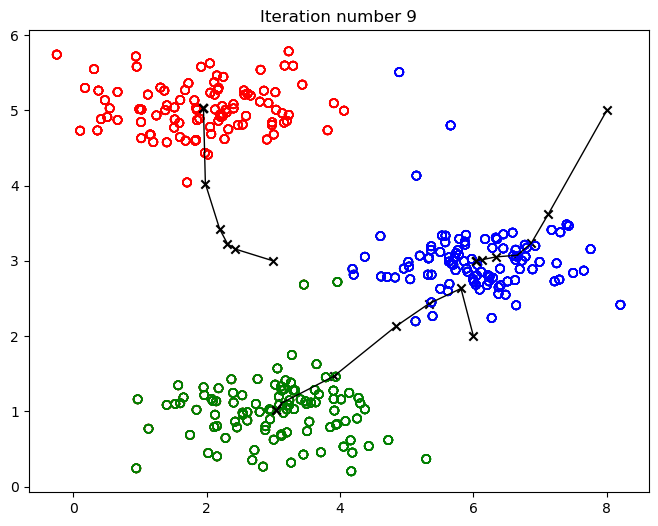

In [32]:
X = np.load('ex7_X.npy')

# Set initial centroids
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

# Number of iterations
max_iters = 10

# run K-means
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

### Random intialization
- A good strategy for intializing the centroids is to select random examples from the training set.
- kMeans_init_centroids(),
    - The code first randomly shuffles the indices of the examples
    - Then, it selects the first K examples based on the random permutation of the indices
    - This allows the examples to be selected at random without the risk of selecting the same example twice.

In [35]:
def kMeans_init_centroids(X, K):
    '''
    This function initializes K centroids that are to be used in K-means on the dataset X.
    
    Args : 
        X (ndarray) : Data points
        K (int) : number of centroids/clusters
        
    Returns : 
        centroids (ndarray) : Initialized centroids
    '''
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids
    

K-means iteration 0/9
K-means iteration 1/9
K-means iteration 2/9
K-means iteration 3/9
K-means iteration 4/9
K-means iteration 5/9
K-means iteration 6/9
K-means iteration 7/9
K-means iteration 8/9
K-means iteration 9/9


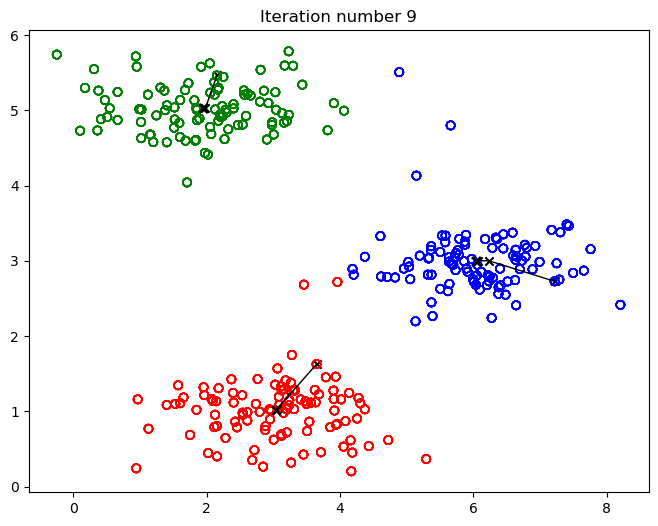

In [39]:
# Set the number of centroids and max number of iterations
K = 3
max_iters = 10

# Set initial centroids by picking random examples from the dataset
initial_centroids = kMeans_init_centroids(X, K)

# Run K-means
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

## Image Compression with K-means
- Will apply K-means to image compression
    - In a straightforward 24-bit color representation of an image^2, each pixel is represented as three 8-bit unsigned intergers (ranging from 0 to 255) that specify the red, green and blue intensity values. 
    - Image contains thousands of colors, and we will reduce the number of colors to 16 colors. 
    - By making this reduction, it is possible to represent (compress) the photo in an efficent way.
    - Specifically, we only need to store the RGB values of the 16 selected colors, and      each pixel in the image we now need to only store the index of the color at the location (where only 4 bits are necessary to represent 16 possibilities).

- We will use the K-means algorithm to select the 16 colors that will be used to represent the compresseed image.
    - We will treat every pixel in the original image as a data example and use the K-means algorithm to find the 16 colors that best group (cluster) the pixel in the 3-dimensional RGB space.
    - Once we have computed the clusters centroids on the image, we will then use the 16 colors to replace the pixels in the original image.

In [40]:
# Load the image
original_img = plt.imread('bird_small.png')

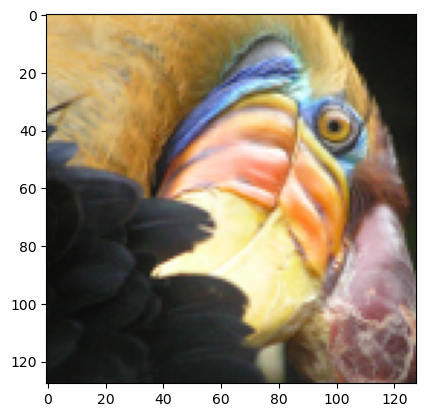

In [41]:
plt.imshow(original_img)

In [42]:
original_img.shape

(128, 128, 3)

- This creats a 3D matrix original_img where
    - The first 2 indices identify a pixel position, and
    - The third index represents red, green or blue
#### Process Data
- To call the run_kMeans, we need to 1st transform the matrix original_img into a 2D matrix.
    - The code will reshape the matrix original_mg to create an m x 3 matrix of pixel colors (where m = 16384 =  128 x 128)

In [49]:
# Divide by 255 so that all values are in the range 0 - 1 (not needed for PNG files)
# Original_img = original / 255

# Reshape the image into an m x 3 matrix where m = number of pixels
# Each row will contain Red,Green and Blue pixel values
# This gives us the dataset matrix X_img that we will use k-means on.

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

### K-means on image pixels

In [53]:
# Rund our k-means algorithm on this data.
# We will try different values of k and max_iters here
k = 16
max_iters = 10

# Use the function we have implemented
initial_centroids = kMeans_init_centroids(X_img, k)

# Run k-means
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-means iteration 0/9
K-means iteration 1/9
K-means iteration 2/9
K-means iteration 3/9
K-means iteration 4/9
K-means iteration 5/9
K-means iteration 6/9
K-means iteration 7/9
K-means iteration 8/9
K-means iteration 9/9


<Figure size 800x600 with 0 Axes>

In [54]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first 5 elements:", idx[:5])

Shape of idx: (16384,)
Closest centroid for the first 5 elements: [10  2 10 10 10]


- These represente the centroids after running k-means. these will be the 16-colors that we will use to compress the image.
    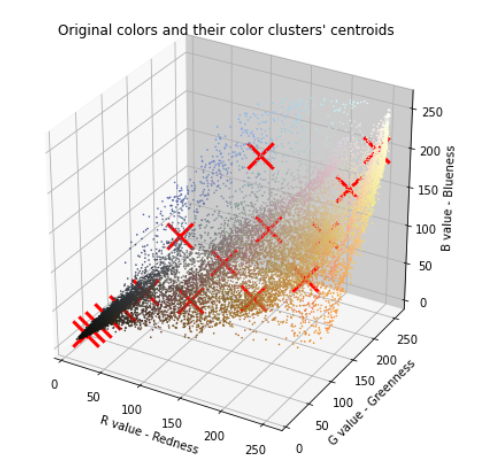

### Compress the image
- We can now assign each pixel position to its closest centroid using the find_closest_centroids function
    - This allows us to represent the original image using the centroid assignment of each pixel.
    - Notice that we have significantly reduced the number of bits that are required to describe the image.
        - The original image required 24 bits (i.e 8 bits x 3 channels in RGB encoding) for each one of 128 x 128 pixel locations, resulting in total size of 128 x 128 x 24 =  393, 216 bits.
        - The new representation requires some overhead storage in form of a dictionary of 167 colors, each of which require 24 bits, but the image itself then only requires 4 bits per pixel location.
        - The final number of bits used is therefore 167 x 24 + 128 x 128 x 4 = 65, 920 bits, which corresponds to compressing the original image by about a factor of 6.

In [55]:
# Find the closet centroid of each pixel
idx = find_closest_centroids(X_img, centroids)

# Replace each pixel with the color of the closet centroid
X_recovered = centroids[idx, :]

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape)

- Finally, we can view the effects of the compression by reconstructing the image based only on the centroid assignemnts
    - Specifically, we replaced each pixel with the value of the centroid assigned to it.
    - 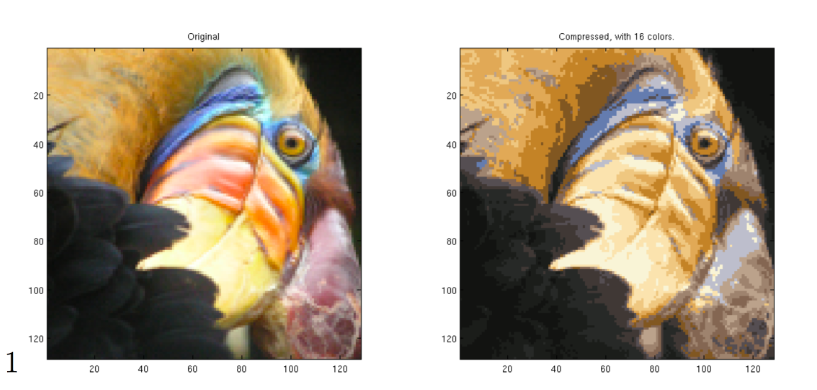